In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
tesla=pd.read_csv(r"C:\Users\kishor\OneDrive\Desktop\testset.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [3]:
tesla=pd.read_csv(r"C:\Users\kishor\OneDrive\Desktop\testset.csv")
tesla.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       125 non-null    object 
 1   Open       125 non-null    float64
 2   High       125 non-null    float64
 3   Low        125 non-null    float64
 4   Close      125 non-null    float64
 5   Adj Close  125 non-null    float64
 6   Volume     125 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.0+ KB


<Axes: >

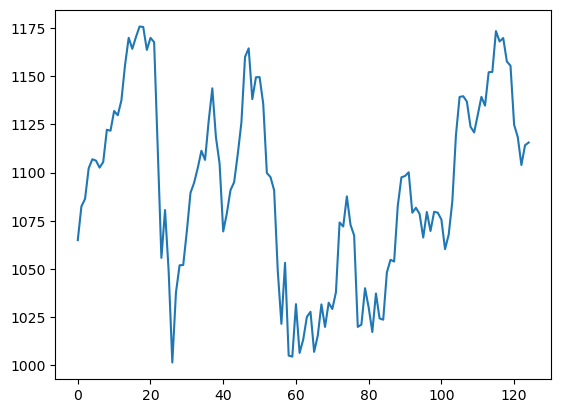

In [5]:
tesla['Close'].plot()

In [6]:
len(tesla)

125

In [7]:
tesla_close=tesla['Close']

In [8]:
tesla_close

0      1065.000000
1      1082.479980
2      1086.400024
3      1102.229980
4      1106.939941
          ...     
120    1124.810059
121    1118.459961
122    1103.979980
123    1114.219971
124    1115.650024
Name: Close, Length: 125, dtype: float64

In [9]:
tesla_close.reset_index(drop=True,inplace=True)
tesla_close

0      1065.000000
1      1082.479980
2      1086.400024
3      1102.229980
4      1106.939941
          ...     
120    1124.810059
121    1118.459961
122    1103.979980
123    1114.219971
124    1115.650024
Name: Close, Length: 125, dtype: float64

In [10]:
tesla_close=pd.DataFrame(tesla_close)
tesla_close

,Close
0,1065.000000
1,1082.479980
2,1086.400024
3,1102.229980
4,1106.939941
...,...
120,1124.810059
121,1118.459961
122,1103.979980
123,1114.219971


In [11]:
training_data_len=int(np.ceil(len(tesla_close)*.95))
training_data_len

119

In [12]:
train=tesla_close.iloc[:training_data_len]
test=tesla_close.iloc[training_data_len:]

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()

In [15]:
scaler.fit(train)

MinMaxScaler()

In [16]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [18]:
len(test)

6

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

In [20]:
df_array=np.array(tesla_close)
df_array.shape

(125, 1)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=7)

In [22]:
length=(len(test))-1

In [23]:
scaled_test.shape

(6, 1)

In [24]:
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=16)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=16)

In [25]:
model2=Sequential()
model2.add(LSTM(60,input_shape=(length,1)))
model2.add(Dropout(rate=0.2))
model2.add(Dense(1))

In [26]:
model2.compile(optimizer='adam',loss='mse')

In [27]:
model2.fit_generator(generator,epochs=50,validation_data=validation_generator,shuffle=False)

Epoch 1/50
8/8 [==============================] - 5s 129ms/step - loss: 0.3071 - val_loss: 0.2437
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.1753 - val_loss: 0.0860
Epoch 3/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0779 - val_loss: 0.0056
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0458 - val_loss: 0.0093
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0467 - val_loss: 0.0157
Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0475 - val_loss: 0.0020
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0394 - val_loss: 5.4563e-05
Epoch 8/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0376 - val_loss: 5.4195e-05
Epoch 9/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0392 - val_loss: 2.4946e-04
Epoch 10/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0389 - val_loss: 8.1145e-04
Epoch 11/50


<Axes: >

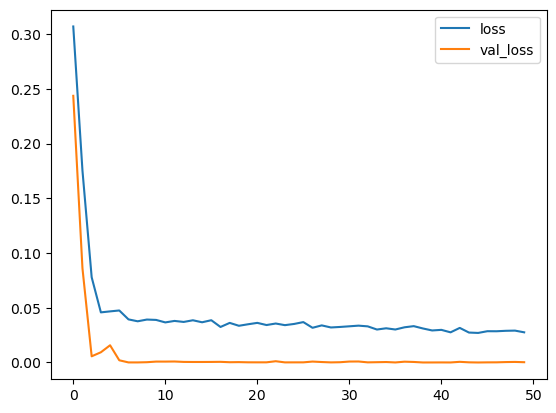

In [28]:
losses=pd.DataFrame(model2.history.history)
losses.plot()

In [29]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,1))
for i in range((len(test))):
    current_pred=model2.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
 

1/1 [==============================] - 0s 47ms/step


In [30]:
test_predictions

[array([0.88295573], dtype=float32),
 array([0.8692585], dtype=float32),
 array([0.84765124], dtype=float32),
 array([0.82765096], dtype=float32),
 array([0.8077969], dtype=float32),
 array([0.7909679], dtype=float32)]

In [31]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions

array([[1155.43681517],
       [1153.04911879],
       [1149.28253894],
       [1145.7960914 ],
       [1142.3351312 ],
       [1139.40149842]])

In [32]:
test['LSTM_Predictions']=true_predictions
test

,Close,LSTM_Predictions
119,1155.479980,1155.436815
120,1124.810059,1153.049119
121,1118.459961,1149.282539
122,1103.979980,1145.796091
123,1114.219971,1142.335131
124,1115.650024,1139.401498


<Axes: >

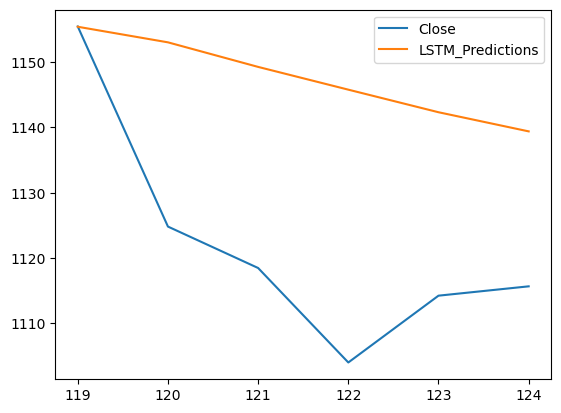

In [33]:
test.plot()

In [34]:
forcast2=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,1))
for i in range(len(test)):
    current_pred=model2.predict(current_batch)[0]
    forcast2.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 34ms/step


In [35]:
forcast2=scaler.inverse_transform(forcast2)


In [36]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forcast2.flatten())))
previouss_data=pd.DataFrame(df_array.flatten())
future_data=pd.DataFrame(forcast2.flatten())

Text(0, 0.5, 'close')

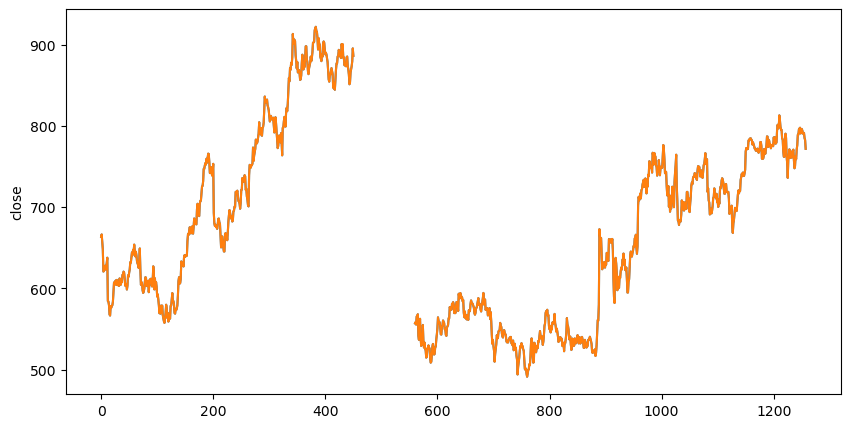

In [39]:
plt.figure(figsize=(10,5))
plt.plot(full_data,label='predicted')
plt.plot(previouss_data,label='original')
plt.ylabel('close')
